
## FINANCIAL ECONOMETRICS
MODULE 6 | LESSON 3

---

# **COINTEGRATION AND ERROR CORRELATION MODEL**

|  |  |
|:---|:---|
|**Reading Time** | 60 minutes |
|**Prior Knowledge** |Time series analysis, VAR model   |
|**Keywords** | Spurious regression, Cointegration, Engle-Granger Two-Step Procedure, Error Correction Model  |


---

*In this lesson, we are going to investigate the issue of using non-stationary time series to run a regression model. We will first point out the problem if both dependent time series and independent time series are non-stationary. Then, we will elaborate that, under certain circumstances, we can still use non-stationary time series to run a regression. That is when different time series are cointegrated in one model. Then, we will introduce a revised regression model for cointegrated time series. In this lesson, we will focus on only two time series. In the next lesson, we will extend the analysis to more than two time series.*

In [1]:
# Load packages
import matplotlib.pyplot as plt
import pandas as pd
from arch.unitroot import ADF 
#!pip install arch has previously been run
from arch.unitroot.cointegration import phillips_ouliaris
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.ardl import UECM

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

In [2]:
# Download datasets
forex = pd.read_csv("M6. forex_1.csv")

# Convert date variable to date format
forex["Date2"] = pd.to_datetime(forex["Date"], format="%m/%d/%Y")
forex = forex.loc[:, ["Date2", "AUDUSD", "NZDUSD", "USDCAD"]].set_index("Date2")[64:]

## **1. Spurious Regression**

**Spurious regression** means one random walk time series runs an ordinary least squares regression on another random walk time series and the regression result will show a significant relationship even if the two random walk time series are independent. Granger and Newbold (1974) show that the regression result will likely show a non-existing relationship. 

Assume we have time series $x_t$ and $y_t$ and both of them are $I(1)$. If we run the following ordinary least squares (OLS) regression:

$$ y_t = \beta_0 + \beta_1 x_t + \epsilon_t $$

If $\epsilon_t$ is also $I(1)$, which means $\epsilon_t$ is serially correlated. We can write $\epsilon_t$  as follows:

$$ \epsilon_t = \epsilon_{t-1}+\nu_t $$

where $\nu_t$ is stationary.

In this case, we cannot run this OLS regression because the error term cannot be serially correlated, and also, the variance will change over time. When the error term $\epsilon_t$ of OLS estimation is described like above, **Durbin-Watson statistic (DW test)** should be able to detect it. DW test is a test to check for autocorrelation for residuals of a model. The DW statistic has a value between $0$ and $4$. When the DW statistic is close to $2$, there is no autocorrelation. To formally test for positive correlation or negative correlation, we need to use DW tables and identify two values $d_L$ and $d_U$. Then

> if $0 \le  DW < dL$ : positively correlated. <br>
> if $d_U < DW \le 4$ : negatively correlated. <br>
> if $d_L \le DW \le d_U$ : test is inconclusive. <br>

Since $\epsilon_t$ is $I(1)$, we can also write $\epsilon_t$ as follows:

$$ \epsilon_t = \alpha \epsilon_{t-1} + \nu_t $$ 

where $\alpha = 1$.

From the above presentation, we can view $\epsilon_t$ as an AR process with unit root. 

The common features from a spurious regression result are as follows:

> a. $x_t$ and $y_t$ will have a significant relationship even though the true value of $\beta_1 =0$ <br>
> b. t-test for linearity will be significant <br>
> c. $R^2$ will be high <br>
> d. Low Durbin Watson Statistic <br>

So how do we detect spurious regression problems? For the residuals from an OLS regression, we can draw ACF plot, run DW test and unit root test to check for the residuals to see if they are autocorrelated.

The lesson from spurious regression is to always check for stationarity of time series before using them in an OLS regression. 

However, having $x_t$ and $y_t$ being $I(1)$ does not imply $\epsilon_t$ is always $I(1)$. When $\epsilon_t$ is $I(0)$ or stationary, we call $x_t$ and $y_t$ cointegrated.


## **2. Cointegration**

### **2.1. The Basics**

Time series $x_t$ and $y_t$ are cointegrated if they have the following properties:

> a. $x_t$ and $y_t$ are non-stationary. <br>
> b. A stationary linear combination of $x_t$ and $y_t$ exists.

We can rephrase the above definition as follows: Assume $x_t\sim I(1)$ and $y_t\sim I(1)$. If we run an OLS regression of $y$ on $x$ or an OLS regression of $x$ on $y$ and the residual is stationary or $I(0)$, then $x_t$ and $y_t$ have the same stochastic trend and are cointegrated. 

If $x_t$ and $y_t$ are cointegrated, then $x_t$ and $y_t$ have a long-term stable relationship even though they are non-stationary. We say that $x_t$ and $y_t$ have long-term equilibrium. It means in the short-term, $x_t$ and $y_t$ might deviate from each other, but they will ultimately revert back to their long-term relationship. We call it the **mean reversion property**. This property happens to many financial variables. One common example is the difference between long-term interest rates and short-term interest rates. In general, long-term interest rates and short-term interest rates are not stationary. However, their difference can be stationary. Let's look at one example between the Australian Dollar/U.S. Dollar (AUDUSD) and New Zealand Dollar/U.S. Dollar (NZDUSD) foreign exchange (forex) rates time series.


**Figure 1: AUDUSD and NZDUSD Plot from 2016 to 2021**


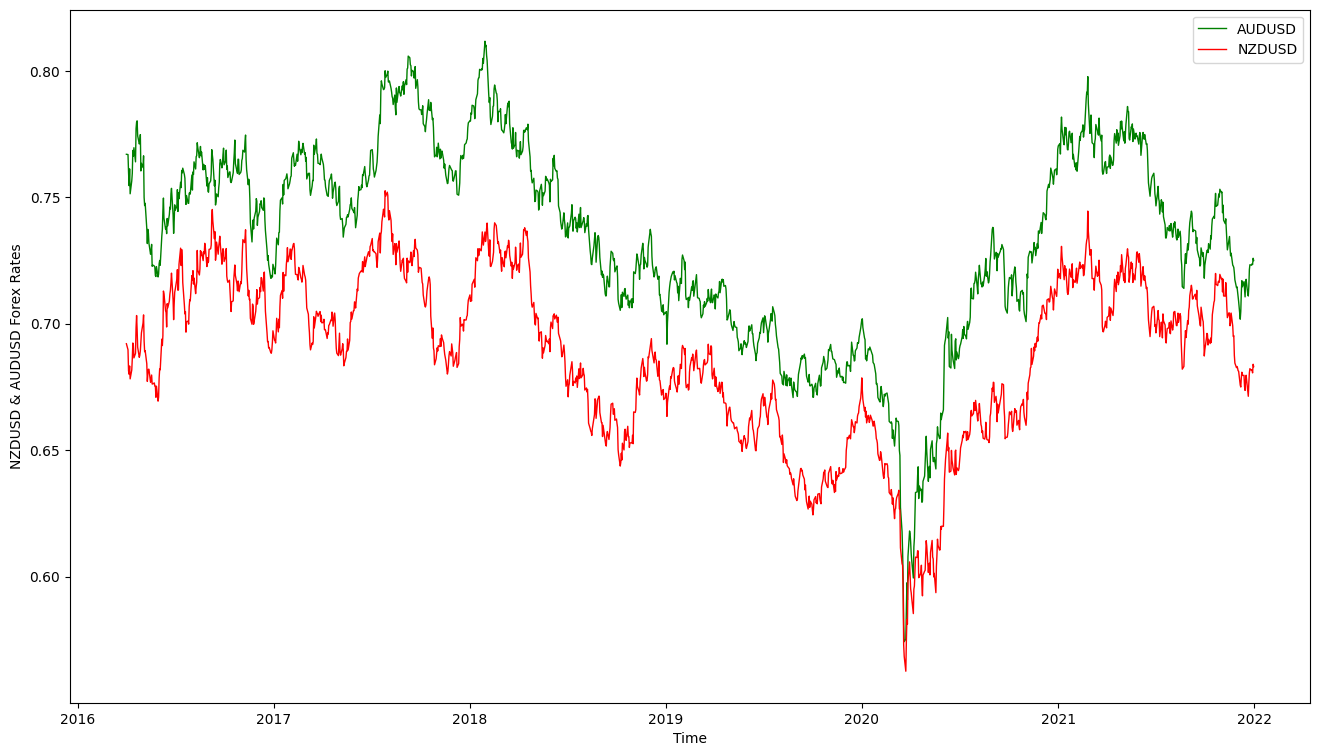

In [3]:
# AUDUSD and NZDUSD Plot from 2016 to 2021
plt.plot(forex.AUDUSD, linewidth=1, c="g", label="AUDUSD")
plt.plot(forex.NZDUSD, linewidth=1, c="r", label="NZDUSD")
plt.xlabel("Time")
plt.ylabel("NZDUSD & AUDUSD Forex Rates")
plt.legend()
plt.show()

Figure 1 shows the time plot for both AUDUSD and NZDUSD. From the plot, we can see the two forex rates move in tandem from 2016 to 2021. In figure 2, we show the difference between AUDUSD and NZDUSD. From the plot, the difference seems to be moving in a broad channel.


**Figure 2: Difference of AUDUSD and NZDUSD Plot from 2016 to 2021**


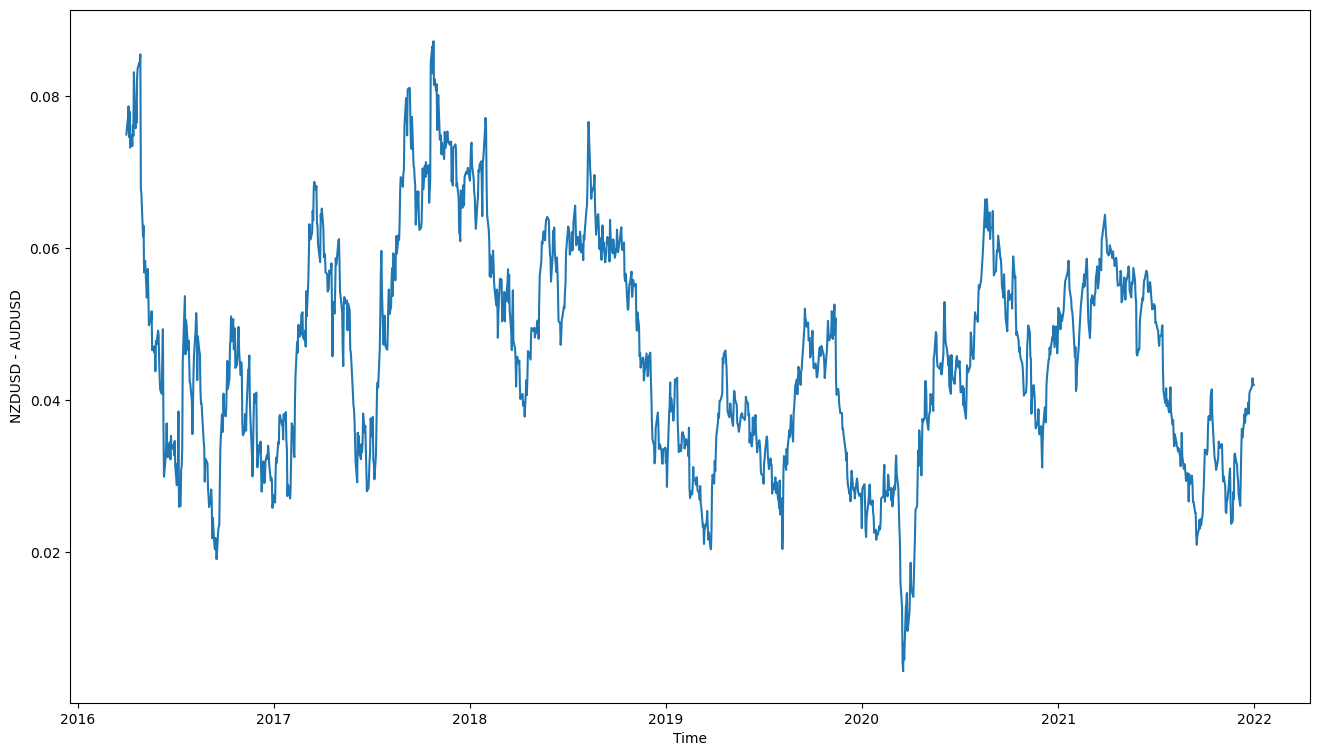

In [4]:
# Difference of AUDUSD and NZDUSD Plot from 2016 to 2021
plt.plot(forex.AUDUSD - forex.NZDUSD)
plt.xlabel("Time")
plt.ylabel("NZDUSD - AUDUSD")
plt.show()

### **2.2 Engle-Granger Two-Step Procedure (EG Test) to Test for Cointegration**

In the last section, we talked about the definition of two time series cointegrating with each other. In this section, we are going to introduce methods to test for two time series to see if they are cointegrated. First, we will introduce the **Engle-Granger two-step procedure**. We'll call it the EG test for short in this lesson. This is a popular method to test for cointegration. In the next lesson, we will introduce another method.

Engle and Granger (1987) proposed a method to test for cointegration of two time series. The EG test is based on the definition of cointegration we discussed in the previous section.

The idea of EG test is as follows. Assume $x_t$ and $y_t$ are two $I(1)$  time series. We first run the following OLS regression:

$$ y_t = \beta_0 + \beta_1 x_t + u_t $$ 

where $u_t$ is the residuals and $\beta_1$ is the cointegration coefficient.

Sometimes, we call $u_t$ an equilibrium error since it measures the deviation of the actions of $x_t$ and $y_t$ from long-term equilibrium. Then, we run an augmented Dickey-Fuller test on $u_t$ to see if it has a unit root. If $u_t$ has a unit root, it means that $x_t$ and $y_t$ are not cointegrated. If $u_t$ has no unit root, then $x_t$ and $y_t$ are cointegrated. However, there is a twist. Since $u_t$ is a residual from an OLS regression of two time series, we cannot use the regular Dickey-Fuller table to decide the critical values for testing. Phillips and Ouliaris (1990) (**PO Test**) provided a method and tables for critical values to check for unit roots for residuals. Instead of the ADF test, Phillips and Ouliaris use another popular unit root test, the Phillips-Perron Test, to check for unit root and generate the tables. In general, these types of tests we are using are **residual-based tests for cointegration** since we check residuals for unit root to decide cointegration. We also call it a **single equation approach** as we only run one OLS regression. The $H_0$ and $H_1$ of the test is as follows:

> $H_0$: $u_t$ has unit root (non-stationary) / $x_t$ and $y_t$ are not cointegrated <br>
> $H_1$: $u_t$ does not have unit root (stationary) / $x_t$ and $y_t$ are cointegrated

If we reject $H_0$ and confirm $x_t$ and $y_t$ are cointegrated, we say the estimate of $\beta_1$ from the OLS regression is **super-consistent**. Super-consistent means the sample estimate converges to the true population parameter. We do not need to take the difference of $x_t$ and $y_t$ before running an OLS regression. We do not have to worry about the spurious regression issue when $x_t$ and $y_t$ are cointegrated.

Let's summarize the steps to run an EG test.

> a. Check if $x_t$ and $y_t$ are $I(1)$. <br>
> b. Run an OLS regression of $x_t$ on $y_t$ or $y_t$ on $x_t$ and obtain the residual $u_t$. <br>
> c. Test $u_t$ for a unit root by using Phillips and Ouliaris method or tables. If $u_t$ has a unit root, then $x_t$ and $y_t$ are not cointegrated. If $u_t$ does not have a unit root, then $x_t$ and $y_t$ are cointegrated. <br>


### **2.3 EG Test for Cointegration Example: AUDUSD vs NZDUSD**

After describing how to use the EG test to check for cointegration of two time series, let's apply it to AUDUSD and NZDUSD historical forex rates.

We first have to check if AUDUSD and NZDUSD are $I(1)$. In order to be $I(1)$, both time series should have a unit root for the ADF test for the levels of AUDUSD and NZDUSD. 


**Figure 3: ADF Test Results for AUDUSD and NZDUSD Forex Rates From 2016 to 2021**
<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

In [5]:
# ADF Test Results for AUDUSD
AUDUSD_adf = ADF(forex.AUDUSD, trend="n", method="bic")
print(
    "AUDUSD Augmented Dickey-Fuller Unit Root Test\n", AUDUSD_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", AUDUSD_adf)

# ADF Test Results for NZDUSD
print("\n", "# " * 39, "\n")
NZDUSD_adf = ADF(forex.NZDUSD, trend="n", method="bic")
print(
    "NZDUSD Augmented Dickey-Fuller Unit Root Test\n", NZDUSD_adf.regression.summary()
)
print("\nTest statistics and critical values: \n", NZDUSD_adf)

AUDUSD Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.1392
Date:                Mon, 16 Jun 2025   Prob (F-statistic):                       0.709
Time:                        19:24:41   Log-Likelihood:                          6067.5
No. Observations:                1497   AIC:                                 -1.213e+04
Df Residuals:                    1496   BIC:                                 -1.213e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0

Figure 3 shows the result of the ADF tests on levels of AUDUSD and NZDUSD. We can see that we cannot reject $H_0$ that there is a unit root for both cases. Now let's check the difference of AUDUSD and NZDUSD.


**Figure 4: ADF Test Results for First Difference of AUDUSD and NZDUSD Forex Rates from 2016 to 2021**


In [6]:
# ADF Test Results for First Difference of AUDUSD Forex Rates
AUDUSD_d_adf = ADF(forex.AUDUSD.diff().dropna(), trend="n", method="bic")
print(
    "First Difference of AUDUSD Augmented Dickey-Fuller Unit Root Test\n",
    AUDUSD_d_adf.regression.summary(),
)
print("\nTest statistics and critical values: \n", AUDUSD_d_adf)

# ADF Test Results for First Difference of NZDUSD Forex Rates
print("\n", "# " * 39, "\n")
NZDUSD_d_adf = ADF(forex.NZDUSD.diff().dropna(), trend="n", method="bic")
print(
    "First Difference of NZDUSD Augmented Dickey-Fuller Unit Root Test\n",
    NZDUSD_d_adf.regression.summary(),
)
print("\nTest statistics and critical values: \n", NZDUSD_d_adf)

First Difference of AUDUSD Augmented Dickey-Fuller Unit Root Test
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.499
Model:                            OLS   Adj. R-squared (uncentered):              0.499
Method:                 Least Squares   F-statistic:                              1489.
Date:                Mon, 16 Jun 2025   Prob (F-statistic):                   1.15e-226
Time:                        19:24:43   Log-Likelihood:                          6062.8
No. Observations:                1496   AIC:                                 -1.212e+04
Df Residuals:                    1495   BIC:                                 -1.212e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t

Figure 4 shows the ADF test results for the first difference of AUDUSD and NZDUSD. In both cases, we can easily reject $H_0$ that a unit root exists. Hence, we can claim that both AUDUSD and NZDUSD are $I(1)$.

The next step is to run an OLS model and then test the residuals for a unit root. As described in the last section, we will use Phillips and Ouliaris method and the table (PO test) to check for stationarity of residuals. We present the results in the following figure.


**Figure 5: Two-Step Residual Based Test for Cointegration for AUDUSD and NZDUSD**


In [7]:
# Two-Step Residual Based Test for Cointegration for AUDUSD and NZDUSD
# (aka Phillips and Ouliaris cointegration test)
print(
    phillips_ouliaris(
        forex.AUDUSD, forex.NZDUSD, trend="c", test_type="Za", kernel="bartlett"
    )
)

Phillips-Ouliaris Za Cointegration Test
Statistic: -28.879606159222842
P-value: 0.008370870568044947
Null: No Cointegration, Alternative: Cointegration
Kernel: Bartlett
Bandwidth: 6.4927
Trend: c
Distribution Order: 3


/usr/local/lib/python3.11/site-packages/arch/compat/numba.py:46: PerformanceWarning: 
numba is not available, and this function is being executed without JIT
compilation. Either install numba or reinstalling after installing Cython
is strongly recommended.
  warnings.warn(performance_warning, PerformanceWarning)


From figure 5, we can see the $p$-value is less than 0.05 critical value. Hence, we can reject $H_0$ and claim that AUDUSD and NZDUSD are cointegrated. 


## **3. Error Correction Model**

In section 1, we talked about the fact that if we run a regression on non-stationary time series, we might run into a spurious regression issue. In section 2, we went through the situation when two time series are cointegrated, the residuals of their regression will be stationary. We also discussed the fact that when time series are cointegrated, there exists a long-term equilibrium among them. We have already seen many different financial data moving in different directions in short term but in the long run they display a consistent relationship. How can we use what we have learned about cointegration to build a financial model and analyze the behavior of cointegrated non-stationary time series? The error correction model provides an answer for us. 

**Error correction model (ECM)** is actually a continuation of cointegration analysis. Let's use an example to understand what ECM is. Assume we have two cointegrated non-stationary time series $x_t$ and $y_t$. 

Since $x_t$ and $y_t$ are cointegrated, they exist in a long-term relationship as follows:

$$ y_t = \beta_0 + \beta_1 x_t + \epsilon_t $$

We can rewrite the relationship as follows:

$$ \epsilon_t = y_t - \beta_0 - \beta_1 x_t $$

However, we would like to build a model that can include both long-term relationships and short-term fluctuations. We still want $y_t$ to be the dependent time series and $x_t$ to be an independent time series. We also will include lag terms $x_{t-1}$ and $y_{t-1}$ so the model can account for the impact of time series in the previous time points. Now, we can write a new regression model as follows: 

$$ y_t = \theta_0 + \theta_1 x_t + \theta_2 x_{t-1} + \phi y_{t-1} + u_t $$

Where $u_t$ is serially uncorrelated white noise.

With some manipulation and substitutions from the long-term equilibrium (cointegration) equation, we can rewrite the above regression model as follows: (proof is in the ECM Proof section)

$$ \Delta y_t = \alpha_0 + \alpha_1 \Delta x_t + \lambda[y_{t-1} - \beta_0 - \beta_1 x_{t-1}] + u_t $$

Where

> $\alpha_0 = \theta_0 - (1-\phi) \beta_0$ <br>
> $\alpha_1 = \theta_1$  <br>
> $\lambda = -(1 - \phi)$  <br>
> $\beta_1 = \frac{\theta_1+\theta_2}{1-\phi}$ <br>

If we replace the formula inside the square brackets in the equation above with the long-term equilibrium equation, we get:

$$ \Delta y_t = \alpha_0 + \alpha_1 \Delta x_t + \lambda [\epsilon_{t-1}] + u_t $$

This is the basic setup for an error correction model. This is a very powerful model that combines the short-term behavior and long-term behavior of $x_t$ and $y_t$. 

> **a)** $\alpha_1\Delta x_t $: This part captures the short-term impact of the movement of $x_t$ on $y_t$. <br>
>
>**b)** We know both $x_t$ and $y_t$ are $I(1)$, so $\Delta x_t$ and $\Delta y_t$ are $I(0)$ and stationary. Also, since $x_t$ and $y_t$ are cointegrated, the residuals $\epsilon_t$ from their regression will be $I(0)$ too. Therefore, in ECM regression, all our terms are stationary. We will not have the spurious regression issue. <br>
>
>**c)** $\lambda[\epsilon_{t-1}]$: This is the error correction term in the regression. This is the part of the regression that captures the long-term dynamics of $x_t$ and $y_t$. What does it mean? Say at time $t-1$, $\ \epsilon_{t-1}$ is positive. It means $y_{t-1}\gt \beta_0+\beta_1 x_{t-1}$. Hence, there is a disequilibrium happening for $x$ and $y$ at $t-1$. Assume $\lambda$ is negative. At time $t$, according to the regression model, $\lambda$ is negative, $\epsilon_{t-1}$ is positive, and $\Delta y_t$ will be negative at time $t$. It means that at time $t$, $\ y$ will decrease in order to return to a long-term equilibrium state. This is why this term is called the error correction term and why this model is called error correction model. This term provides the ability to model the force to bring short-term data deviation back to a long-term equilibrium state. $\lambda$ is called the error correction coefficient. It adjusts the speed at which the data will go back to its long-term equilibrium state. In order to have the error correction function work, we need to make sure that $\lambda$ is negative. Some literature will say $\lambda$ needs to be positive because they separate the negative sign out from $\lambda$. Be careful when you read other ECM materials. We usually require $\lambda$ to be between $0$ and $-1$ since in most cases the full adjustment does not happen right away. <br>

Before we conclude the theory of this lesson, let's recap what we have learned.

> **a.** When all time series are stationary -> Run OLS regression or VAR model <br>
>
> **b.** When two time series are not stationary: <br>
> -  If non-stationary time series are not cointegrated -> Take the first difference of non-stationary time series and check for stationarity before running an OLS regression. <br>
> - If non-stationary time series are cointegrated -> Error correction model <br>
>
> **c.** When one time series is not stationary and the other one is stationary -> Take the first difference of the non-stationary time series and check for stationarity before running an OLS regression. <br>
>
> **d.** When there are more than two non-stationary time series -> We will discuss this situation in the next lesson. <br>


## **4. ECM Model Example: AUDUSD vs NZDUSD**

In this section, let's run an ECM model on AUDUSD and NZDUSD. AUDUSD will be the dependent variable and NZDUSD will be the independent variable. In the last section, we have already checked that both AUDUSD and NZDUSD are $I(1)$ and they are cointegrated. Hence, we can run an ECM on them. Figure 6 shows the model results.


**Figure 6: Error Correction Model Result for AUDUSD on NZDUSD from 2016 to 2021**


In [8]:
# Error Correction Model Result for AUDUSD on NZDUSD
ecm_model = UECM(
    endog=pd.DataFrame(forex.AUDUSD),
    lags=1,
    exog=pd.DataFrame(forex.NZDUSD),
    order=1,
    trend="c",
).fit()
print(ecm_model.summary())

                              UECM Model Results                              
Dep. Variable:               D.AUDUSD   No. Observations:                 1498
Model:                     UECM(1, 1)   Log Likelihood                6872.820
Method:               Conditional MLE   S.D. of innovations              0.734
Date:                Mon, 16 Jun 2025   AIC                         -13735.640
Time:                        19:24:55   BIC                         -13709.084
Sample:                             1   HQIC                        -13725.746
                                 1498                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0001      0.001      0.099      0.921      -0.002       0.003
AUDUSD.L1      -0.0157      0.005     -3.469      0.001      -0.025      -0.007
NZDUSD.L1       0.0165      0.005      3.093    

/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Figure 6 shows the ECM results for AUSDUSD and NZDUSD. From the results, we can see all coefficient estimates are significant. $\lambda$ is AUDUSD.L1 = -0.0157, which meets our criteria to be between $0$ and $-1$. It means if the AUDUSD exchange rate deviates 1 point from the long-term equilibrium with NZDUSD at time $t-1$, AUDUSD will drop 0.0157 point at time $t$ to bring it back to long-term equilibrium. 

Next, let's check the residuals to see if there is any autocorrelation issue. We will run the Durbin-Watson test. Figure 7 shows the result.


**Figure 7: Durbin-Watson Test Result for ECM of AUDUSD and NZDUSD**


In [9]:
# Durbin-Watson Test Result for the residuals of ECM of AUDUSD and NZDUSD
residuals = ecm_model.resid

# Durbin-Watson test
dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_stat:.5f}")

Durbin-Watson statistic: 0.00003


From figure 7, we can see the residuals does not pass Durbin-Watson test. It means that the residuals are still serially correlated. 


## **5. ECM Proof**

Assume we have two cointegrated $I(1)$ time series $x_t$ and $y_t$. We can write the long-term equilibrium as follows:

$$ y_t = \beta_0 + \beta_1 x_t + \epsilon_t $$

We would like to build a regression model for $x_t$ and $y_t$ that can account for their long-term relationship and short-term dynamics. We can write the model as the following regression:

$$ y_t = \theta_0 + \theta_1 x_t + \theta_2 x_{t-1} + \phi y_{t-1} + u_t $$

Where $u_t$ is serially uncorrelated white noise

First, we add lag term $y_{t-1}$ to both side of the regression.

$$ y_t - y_{t-1} = \theta_0 + \theta_1 x_t + \theta x_{t-1} + \phi y_{t-1} - y_{t-1} + u_t $$

$$ \Rightarrow \Delta y_t = \theta_0 + \theta_1 x_t + \theta x_{t-1} - (1 - \phi) y_{t-1} + u_t $$


We then add these two terms into the right-hand side of the regression $-\theta_1 x_{t-1}$ and $\theta_1 x_{t-1}$.

$$ \Delta y_t = \theta_0 + \theta_1 x_t - \theta_1 x_{t-1} + \theta_1 x_{t-1} + \theta_2 x_{t-1} - (1-\phi) y_{t-1} + u_t $$

$$ \Rightarrow \Delta y_t = \theta_0 + \theta_1 \Delta x_t + (\theta_1 + \theta_2) x_{t-1} - (1 - \phi) y_{t-1} + u_t $$

$$ \Rightarrow \Delta y_t = \theta_0 + \theta_1 \Delta x_t - (1 - \phi) [y_{t-1} - \frac{\theta_1+\theta_2}{1-\phi} x_{t-1}] + u_t $$


Then, we add these two terms into the right-hand side of the regression $-(1-\phi) \beta_0$ and $(1-\phi) \beta_0$.

$$ \Delta y_t = \theta_0 - (1-\phi) \beta_0 + \theta_1 \Delta x_t - (1-\phi) [y_{t-1} - \beta_0 - \frac{\theta_1+\theta_2}{1-\phi} x_{t-1}] + u_t $$

We can rewrite the above regression as follows:

$$ \Delta y_t = \alpha_0 + \alpha_1 \Delta x_t + \lambda [y_{t-1} - \beta_0 - \beta_1 x_{t-1}] + u_t $$

Where

> $\alpha_0 = \theta_0 - (1 - \phi) \beta_0$ <br>
> $\alpha_1 = \theta_1$  <br>
> $\lambda = -(1 - \phi)$  <br>
> $\beta_1 = \frac{\theta_1+\theta_2}{1-\phi}$ <br>


We can also replace the formula in the $[ \ ]$ with the error term in $t-1$ from the long-term equilibrium equation.

$$ \Delta y_t = \alpha_0 + \alpha_1 \Delta x_t + \lambda [\epsilon_{t-1}] + u_t $$


## **6. Conclusion**

In this lesson, we looked into when we may have to run a regression on non-stationary time series. We discussed the issue of spurious regression. We then introduced the concept of cointegration among two non-stationary time series. If the two time series are cointegrated, we can run an OLS regression without issue. Lastly, we introduced the error correction model, which can model both the short-term activity and long-term equilibrium of two cointegrated time series. In next lesson, we will extend our analysis to multiple time series.


## **References**

- Engle, Robert F., and C. W. J. Granger. "Cointegration and Error Correction: Representation, Estimation and Testing." Econometrica, vol. 55, no. 2, 1987, pp. 251–276.

- Granger, C. W. J., and P. Newbold. "Spurious Regressions in Econometrics." Journal of Econometrics, vol. 2, no. 2, 1974, pp. 111–120.

- Phillips, P. C. B., and S. Ouliaris. "Asymptotic Properties of Residual Based Tests for Cointegration." Econometrica, vol. 58, no. 1, 1990, pp. 165–193.


---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
